In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV




In [278]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(list(uploaded.keys())[0])

Saving final_Clean_flattened_cleaned_Official_V3_numeric.csv to final_Clean_flattened_cleaned_Official_V3_numeric (1).csv


In [280]:
data=data.drop(columns="Unnamed: 0")


In [281]:
data.head()

,views,applies,remote_allowed,normalized_salary,employee_count,follower_count,company_size,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,...,TitleClean_store manager,TitleClean_supply chain,TitleClean_support specialist,TitleClean_systems engineer,TitleClean_tax manager,TitleClean_technical support,TitleClean_test engineer,TitleClean_travel rn,TitleClean_vice president,TitleClean_warehouse associate
0,4,0,0,110000,102,2831,2,120000,100000,57,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,0
4,8,1,0,70720,1425,982403,4,35,33,35,...,0,0,0,0,0,0,0,0,0,0


In [282]:
data["normalized_salary_hourly"] = (data["max_hourly_salary_in_usd"] + data["min_hourly_salary_in_usd"]) / 2

In [283]:
data.head()

,views,applies,remote_allowed,normalized_salary,employee_count,follower_count,company_size,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,...,TitleClean_supply chain,TitleClean_support specialist,TitleClean_systems engineer,TitleClean_tax manager,TitleClean_technical support,TitleClean_test engineer,TitleClean_travel rn,TitleClean_vice president,TitleClean_warehouse associate,normalized_salary_hourly
0,4,0,0,110000,102,2831,2,120000,100000,57,...,0,0,0,0,0,0,0,0,0,52.5
1,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,50.0
2,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,50.0
3,4,1,0,105000,24,68099,1,200000,10000,96,...,0,0,0,0,0,0,0,0,0,50.0
4,8,1,0,70720,1425,982403,4,35,33,35,...,0,0,0,0,0,0,0,0,0,34.0


In [284]:
y_1=data["max_salary_in_usd"]
y_2=data["min_salary_in_usd"]
y_3=data["normalized_salary_hourly"]

In [285]:
x=data.drop(columns=["max_salary_in_usd","min_salary_in_usd","max_hourly_salary_in_usd","min_hourly_salary_in_usd","normalized_salary","normalized_salary_hourly"])

In [287]:
final_results_df_1 = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'Train_R2', 'Test_R2'])
final_results_df_2 = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'Train_R2', 'Test_R2'])
final_results_df_3 = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'Train_R2', 'Test_R2'])

In [288]:
print(y_1)

0        120000
1        200000
2        200000
3        200000
4            35
          ...  
39953        50
39954        50
39955        50
39956        21
39957     85862
Name: max_salary_in_usd, Length: 39958, dtype: int64


# drop the high correlated features

In [289]:
corr_matrix = x.corr().abs()  # Compute correlation matrix

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

X_selected = x.drop(columns=to_drop)


In [12]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_1, test_size=0.3, random_state=42)

# feature selection

In [13]:
rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)

# Feature importance selection (Now based on X_train's actual columns)
feature_importance_rf = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)),
                                     columns=['predictor', 'feature importance'])

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='feature importance', ascending=False)

# Select top 200 features
selected_features_rf = feature_importance_rf.head(200)['predictor'].tolist()
# Print selected features
print("Top 200 Important Features:", selected_features_rf)

Top 200 Important Features: ['industry_Software Development', 'application_type_SimpleOnsiteApply', 'formatted_work_type_Full-time', 'feature_individual', 'feature_hour', 'employee_count', 'formatted_experience_level_Entry level', 'feature_software', 'feature_education', 'views', 'feature_training', 'formatted_experience_level_Director', 'CompApplication', 'feature_salary', 'formatted_experience_level_Executive', 'feature_engineering', 'industry_Legal Services', 'feature_design', 'feature_strategy', 'TitleClean_software engineer', 'feature_degree', 'feature_market', 'company_size', 'feature_family', 'formatted_experience_level_Mid-Senior level', 'TitleClean_real estate', 'TitleClean_marketing manager', 'feature_growth', 'applies', 'feature_development', 'TitleClean_project manager', 'feature_practice', 'TitleClean_associate attorney', 'country_GB', 'feature_technology', 'feature_equipment', 'feature_account', 'industry_IT Services and IT Consulting', 'remote_allowed', 'feature_marketin

In [14]:
X_train = X_train[selected_features_rf]
X_test = X_test[selected_features_rf]

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [17]:
# Define model parameters
INPUT_DIM = X_train_scaled.shape[1]
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 150

In [18]:
class AdaptiveLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(AdaptiveLayer, self).__init__(**kwargs)
        self.units = units
        self.dense = layers.Dense(units, activation='relu')
        self.batch_norm = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.activation = layers.ReLU()

    def call(self, inputs, training=False):
        x = self.dense(inputs)
        x = self.batch_norm(x, training=training)
        x = self.dropout(x, training=training)
        return self.activation(x)

In [19]:
def create_adaptive_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # First adaptive layer with larger units
    x = AdaptiveLayer(128)(inputs)

    # Multiple adaptive layers with decreasing units
    x = AdaptiveLayer(64)(x)
    x = AdaptiveLayer(32)(x)
    x = AdaptiveLayer(16)(x)

    # Output layer
    outputs = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [20]:
# Create and compile the model
model = create_adaptive_model(INPUT_DIM)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae', 'mse']
)

In [21]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)


In [22]:
# Model checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [23]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,  # Use scaled target
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4667 - mae: 0.7278 - mse: 1.4667
Epoch 1: val_loss improved from inf to 0.03595, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 1.4674 - mae: 0.7275 - mse: 1.4674 - val_loss: 0.0359 - val_mae: 0.1315 - val_mse: 0.0359 - learning_rate: 0.0010
Epoch 2/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3596 - mae: 0.2630 - mse: 0.3596
Epoch 2: val_loss improved from 0.03595 to 0.02369, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3723 - mae: 0.2626 - mse: 0.3723 - val_loss: 0.0237 - val_mae: 0.1094 - val_mse: 0.0237 - learning_rate: 0.0010
Epoch 3/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6117 - mae: 0.1792 - mse: 2.6117
Epoch 3: val_loss improved from 0.02369 to 0.02062, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.6041 - mae: 0.1791 - mse: 2.6041 - val_loss: 0.0206 - val_mae: 0.1027 - val_mse: 0.0206 - learning_rate: 0.0010
Epoch 4/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8437 - mae: 0.1455 - mse: 1.8437
Epoch 4: val_loss improved from 0.02062 to 0.01995, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.8420 - mae: 0.1455 - mse: 1.8420 - val_loss: 0.0200 - val_mae: 0.1008 - val_mse: 0.0200 - learning_rate: 0.0010
Epoch 5/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6128 - mae: 0.1192 - mse: 0.6128
Epoch 5: val_loss improved from 0.01995 to 0.01867, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6192 - mae: 0.1192 - mse: 0.6192 - val_loss: 0.0187 - val_mae: 0.0984 - val_mse: 0.0187 - learning_rate: 0.0010
Epoch 6/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1142 - mae: 0.1085 - mse: 0.1142
Epoch 6: val_loss improved from 0.01867 to 0.01848, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1239 - mae: 0.1086 - mse: 0.1239 - val_loss: 0.0185 - val_mae: 0.0987 - val_mse: 0.0185 - learning_rate: 0.0010
Epoch 7/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2775 - mae: 0.1208 - mse: 2.2775
Epoch 7: val_loss improved from 0.01848 to 0.01843, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.2760 - mae: 0.1208 - mse: 2.2760 - val_loss: 0.0184 - val_mae: 0.0975 - val_mse: 0.0184 - learning_rate: 0.0010
Epoch 8/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8182 - mae: 0.1151 - mse: 1.8182
Epoch 8: val_loss improved from 0.01843 to 0.01814, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.8165 - mae: 0.1151 - mse: 1.8165 - val_loss: 0.0181 - val_mae: 0.0964 - val_mse: 0.0181 - learning_rate: 0.0010
Epoch 9/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9362 - mae: 0.1172 - mse: 1.9362
Epoch 9: val_loss improved from 0.01814 to 0.01775, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.9302 - mae: 0.1172 - mse: 1.9302 - val_loss: 0.0178 - val_mae: 0.0951 - val_mse: 0.0178 - learning_rate: 0.0010
Epoch 10/150
689/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1711 - mae: 0.0997 - mse: 0.1711
Epoch 10: val_loss improved from 0.01775 to 0.01752, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1895 - mae: 0.0998 - mse: 0.1895 - val_loss: 0.0175 - val_mae: 0.0945 - val_mse: 0.0175 - learning_rate: 0.0010
Epoch 11/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2124 - mae: 0.1021 - mse: 0.2124
Epoch 11: val_loss improved from 0.01752 to 0.01687, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2183 - mae: 0.1021 - mse: 0.2183 - val_loss: 0.0169 - val_mae: 0.0932 - val_mse: 0.0169 - learning_rate: 0.0010
Epoch 12/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0433 - mae: 0.1063 - mse: 1.0433
Epoch 12: val_loss improved from 0.01687 to 0.01651, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0450 - mae: 0.1063 - mse: 1.0450 - val_loss: 0.0165 - val_mae: 0.0928 - val_mse: 0.0165 - learning_rate: 0.0010
Epoch 13/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4606 - mae: 0.1177 - mse: 2.4606
Epoch 13: val_loss did not improve from 0.01651
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.4467 - mae: 0.1176 - mse: 2.4467 - val_loss: 0.0165 - val_mae: 0.0931 - val_mse: 0.0165 - learning_rate: 0.0010
Epoch 14/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0061 - mae: 0.1030 - mse: 1.0061
Epoch 14: val_loss improved from 0.01651 to 0.01639, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.0091 - mae: 0.1031 - mse: 1.0091 - val_loss: 0.0164 - val_mae: 0.0929 - val_mse: 0.0164 - learning_rate: 0.0010
Epoch 15/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464 - mae: 0.0943 - mse: 0.0464
Epoch 15: val_loss improved from 0.01639 to 0.01523, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0566 - mae: 0.0943 - mse: 0.0566 - val_loss: 0.0152 - val_mae: 0.0898 - val_mse: 0.0152 - learning_rate: 0.0010
Epoch 16/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mae: 0.0959 - mse: 0.0182
Epoch 16: val_loss improved from 0.01523 to 0.01466, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0251 - mae: 0.0959 - mse: 0.0251 - val_loss: 0.0147 - val_mae: 0.0880 - val_mse: 0.0147 - learning_rate: 0.0010
Epoch 17/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8443 - mae: 0.1063 - mse: 0.8443
Epoch 17: val_loss did not improve from 0.01466
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.8500 - mae: 0.1063 - mse: 0.8500 - val_loss: 0.0156 - val_mae: 0.0899 - val_mse: 0.0156 - learning_rate: 0.0010
Epoch 18/150
690/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9618 - mae: 0.1115 - mse: 1.9618
Epoch 18: val_loss did not improve from 0.01466
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.9504 - mae: 0.1114 - mse: 1.9504 - val_loss: 0.0153 - val_mae: 0.0895 - val_mse: 0.0153 - learning_rate: 0.0010
Epoch 19/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5658 - mae: 0.1443 - mse: 7.5658
Epoch 19: val_loss did not improve from 0.01466
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.4937 - mae: 0.1438 - mse:

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3563 - mae: 0.0902 - mse: 0.3563 - val_loss: 0.0144 - val_mae: 0.0842 - val_mse: 0.0144 - learning_rate: 0.0010
Epoch 22/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4444 - mae: 0.1024 - mse: 1.4444
Epoch 22: val_loss did not improve from 0.01440
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.4438 - mae: 0.1024 - mse: 1.4438 - val_loss: 0.0145 - val_mae: 0.0854 - val_mse: 0.0145 - learning_rate: 0.0010
Epoch 23/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4776 - mae: 0.0917 - mse: 0.4776
Epoch 23: val_loss improved from 0.01440 to 0.01372, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4798 - mae: 0.0918 - mse: 0.4798 - val_loss: 0.0137 - val_mae: 0.0826 - val_mse: 0.0137 - learning_rate: 0.0010
Epoch 24/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7632 - mae: 0.0989 - mse: 1.7632
Epoch 24: val_loss improved from 0.01372 to 0.01341, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.7594 - mae: 0.0989 - mse: 1.7594 - val_loss: 0.0134 - val_mae: 0.0803 - val_mse: 0.0134 - learning_rate: 0.0010
Epoch 25/150
689/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0801 - mae: 0.1000 - mse: 2.0801
Epoch 25: val_loss did not improve from 0.01341
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.0658 - mae: 0.0999 - mse: 2.0658 - val_loss: 0.0137 - val_mae: 0.0804 - val_mse: 0.0137 - learning_rate: 0.0010
Epoch 26/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7814 - mae: 0.0867 - mse: 0.7814
Epoch 26: val_loss improved from 0.01341 to 0.01304, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7879 - mae: 0.0868 - mse: 0.7879 - val_loss: 0.0130 - val_mae: 0.0778 - val_mse: 0.0130 - learning_rate: 0.0010
Epoch 27/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3118 - mae: 0.0833 - mse: 0.3118
Epoch 27: val_loss improved from 0.01304 to 0.01255, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3223 - mae: 0.0834 - mse: 0.3223 - val_loss: 0.0126 - val_mae: 0.0746 - val_mse: 0.0126 - learning_rate: 0.0010
Epoch 28/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3998 - mae: 0.0858 - mse: 0.3998
Epoch 28: val_loss improved from 0.01255 to 0.01239, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4105 - mae: 0.0858 - mse: 0.4105 - val_loss: 0.0124 - val_mae: 0.0741 - val_mse: 0.0124 - learning_rate: 0.0010
Epoch 29/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1113 - mae: 0.0817 - mse: 0.1113
Epoch 29: val_loss improved from 0.01239 to 0.01195, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1257 - mae: 0.0818 - mse: 0.1257 - val_loss: 0.0119 - val_mae: 0.0697 - val_mse: 0.0119 - learning_rate: 0.0010
Epoch 30/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1517 - mae: 0.0987 - mse: 2.1517
Epoch 30: val_loss did not improve from 0.01195
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.1426 - mae: 0.0987 - mse: 2.1426 - val_loss: 0.0124 - val_mae: 0.0746 - val_mse: 0.0124 - learning_rate: 0.0010
Epoch 31/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9301 - mae: 0.0874 - mse: 0.9301
Epoch 31: val_loss did not improve from 0.01195
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.9305 - mae: 0.0874 - mse: 0.9305 - val_loss: 0.0124 - val_mae: 0.0746 - val_mse: 0.0124 - learning_rate: 0.0010
Epoch 32/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3191 - mae: 0.0869 - mse: 1.3191
Epoch 32: val_loss improved from 0.01195 to 0.01190, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.3186 - mae: 0.0869 - mse: 1.3186 - val_loss: 0.0119 - val_mae: 0.0728 - val_mse: 0.0119 - learning_rate: 0.0010
Epoch 33/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4675 - mae: 0.0815 - mse: 0.4675
Epoch 33: val_loss improved from 0.01190 to 0.01130, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4774 - mae: 0.0815 - mse: 0.4774 - val_loss: 0.0113 - val_mae: 0.0679 - val_mse: 0.0113 - learning_rate: 0.0010
Epoch 34/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8134 - mae: 0.0829 - mse: 0.8134
Epoch 34: val_loss did not improve from 0.01130
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8145 - mae: 0.0829 - mse: 0.8145 - val_loss: 0.0114 - val_mae: 0.0679 - val_mse: 0.0114 - learning_rate: 0.0010
Epoch 35/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9652 - mae: 0.0924 - mse: 1.9652
Epoch 35: val_loss did not improve from 0.01130
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.9548 - mae: 0.0924 - mse: 1.9548 - val_loss: 0.0117 - val_mae: 0.0702 - val_mse: 0.0117 - learning_rate: 0.0010
Epoch 36/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5183 - mae: 0.0814 - mse: 0.5183
Epoch 36: val_loss did not improve from 0.01130
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5223 - mae: 0.0815 - mse:

700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3224 - mae: 0.0816 - mse: 0.3224 - val_loss: 0.0109 - val_mae: 0.0672 - val_mse: 0.0109 - learning_rate: 0.0010
Epoch 38/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4320 - mae: 0.0814 - mse: 0.4320
Epoch 38: val_loss improved from 0.01091 to 0.01071, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4436 - mae: 0.0815 - mse: 0.4436 - val_loss: 0.0107 - val_mae: 0.0666 - val_mse: 0.0107 - learning_rate: 0.0010
Epoch 39/150
689/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4540 - mae: 0.0794 - mse: 0.4540
Epoch 39: val_loss improved from 0.01071 to 0.01065, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4675 - mae: 0.0795 - mse: 0.4675 - val_loss: 0.0106 - val_mae: 0.0650 - val_mse: 0.0106 - learning_rate: 0.0010
Epoch 40/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2560 - mae: 0.0857 - mse: 1.2560
Epoch 40: val_loss did not improve from 0.01065
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.2558 - mae: 0.0857 - mse: 1.2558 - val_loss: 0.0111 - val_mae: 0.0666 - val_mse: 0.0111 - learning_rate: 0.0010
Epoch 41/150
689/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4987 - mae: 0.0808 - mse: 0.4987
Epoch 41: val_loss did not improve from 0.01065
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5113 - mae: 0.0808 - mse: 0.5113 - val_loss: 0.0126 - val_mae: 0.0675 - val_mse: 0.0126 - learning_rate: 0.0010
Epoch 42/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6140 - mae: 0.0905 - mse: 1.6140
Epoch 42: val_loss did not improve from 0.01065
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.6134 - mae: 0.0905 - mse:

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5768 - mae: 0.0784 - mse: 0.5768 - val_loss: 0.0106 - val_mae: 0.0637 - val_mse: 0.0106 - learning_rate: 2.0000e-04
Epoch 45/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8968 - mae: 0.0866 - mse: 1.8968
Epoch 45: val_loss did not improve from 0.01058
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.8912 - mae: 0.0865 - mse: 1.8912 - val_loss: 0.0106 - val_mae: 0.0633 - val_mse: 0.0106 - learning_rate: 2.0000e-04
Epoch 46/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3104 - mae: 0.0892 - mse: 2.3104
Epoch 46: val_loss improved from 0.01058 to 0.01039, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.3027 - mae: 0.0891 - mse: 2.3027 - val_loss: 0.0104 - val_mae: 0.0627 - val_mse: 0.0104 - learning_rate: 2.0000e-04
Epoch 47/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6171 - mae: 0.0971 - mse: 3.6171
Epoch 47: val_loss did not improve from 0.01039
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.6137 - mae: 0.0970 - mse: 3.6137 - val_loss: 0.0105 - val_mae: 0.0627 - val_mse: 0.0105 - learning_rate: 2.0000e-04
Epoch 48/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5676 - mae: 0.0782 - mse: 0.5676
Epoch 48: val_loss did not improve from 0.01039
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5752 - mae: 0.0782 - mse: 0.5752 - val_loss: 0.0107 - val_mae: 0.0636 - val_mse: 0.0107 - learning_rate: 2.0000e-04
Epoch 49/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8330 - mae: 0.0995 - mse: 3.8330
Epoch 49: val_loss did not improve from 0.01039
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.8219 - mae: 0

In [24]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Add neural network results to DataFrame
final_results_df_1 = pd.concat([final_results_df_1, pd.DataFrame([{
    'Model': 'Neural Network',
    'Train_RMSE': train_rmse,
    'Test_RMSE': rmse,
    'Train_R2': train_r2,
    'Test_R2': r2
}])], ignore_index=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-24-7f931f7da170>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results_df_1 = pd.concat([final_results_df_1, pd.DataFrame([{


In [25]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")



Model Performance Metrics:
Root Mean Squared Error: 72394.87
R-squared Score: 0.4872


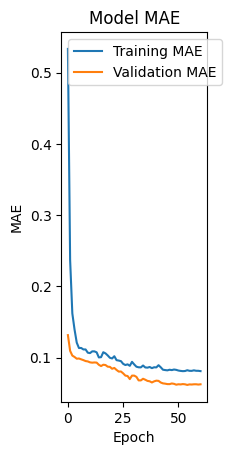

In [26]:
# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()



In [28]:
dt_param_grid = {
    'max_depth': [5, 10,],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 2]
}

# Create grid search for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [29]:
# Fit grid search
dt_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-dt_grid_search.best_score_))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score (RMSE): 0.9956034985503458


In [30]:
# Get best model
dt_best = dt_grid_search.best_estimator_

# Make predictions (scaled)
dt_train_pred = dt_best.predict(X_train_scaled)
dt_test_pred = dt_best.predict(X_test_scaled)

# Inverse transform to get original scale
dt_train_pred_orig = y_scaler.inverse_transform(dt_train_pred.reshape(-1, 1))
dt_test_pred_orig = y_scaler.inverse_transform(dt_test_pred.reshape(-1, 1))
y_train_orig = y_scaler.inverse_transform(y_train_scaled)
y_test_orig = y_scaler.inverse_transform(y_test_scaled)

# Calculate metrics on original scale
dt_train_rmse = np.sqrt(mean_squared_error(y_train_orig, dt_train_pred_orig))
dt_test_rmse = np.sqrt(mean_squared_error(y_test_orig, dt_test_pred_orig))
dt_train_r2 = r2_score(y_train_orig, dt_train_pred_orig)
dt_test_r2 = r2_score(y_test_orig, dt_test_pred_orig)

# Add results to DataFrame
final_results_df_1 = pd.concat([final_results_df_1, pd.DataFrame([{
    'Model': 'Decision Tree',
    'Train_RMSE': dt_train_rmse,
    'Test_RMSE': dt_test_rmse,
    'Train_R2': dt_train_r2,
    'Test_R2': dt_test_r2
}])], ignore_index=True)


In [31]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {dt_test_rmse:.2f}")
print(f"R-squared Score: {dt_test_r2:.4f}")


Model Performance Metrics:
Root Mean Squared Error: 77848.26
R-squared Score: 0.4070


In [32]:
#Gradient Boosting
# Define parameter grid with only n_estimators
gb_param_grid = {
    'n_estimators': [50, 100]
}

# Create grid search
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.01,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ),
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
gb_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-gb_grid_search.best_score_))

# Get best model
gb_best = gb_grid_search.best_estimator_

# Make predictions (scaled)
gb_train_pred = gb_best.predict(X_train_scaled)
gb_test_pred = gb_best.predict(X_test_scaled)

# Inverse transform to get original scale
gb_train_pred_orig = y_scaler.inverse_transform(gb_train_pred.reshape(-1, 1))
gb_test_pred_orig = y_scaler.inverse_transform(gb_test_pred.reshape(-1, 1))

# Calculate metrics on original scale
gb_train_rmse = np.sqrt(mean_squared_error(y_train_orig, gb_train_pred_orig))
gb_test_rmse = np.sqrt(mean_squared_error(y_test_orig, gb_test_pred_orig))
gb_train_r2 = r2_score(y_train_orig, gb_train_pred_orig)
gb_test_r2 = r2_score(y_test_orig, gb_test_pred_orig)

# Add results to DataFrame
final_results_df_1 = pd.concat([final_results_df_1, pd.DataFrame([{
    'Model': 'Gradient Boosting',
    'Train_RMSE': gb_train_rmse,
    'Test_RMSE': gb_test_rmse,
    'Train_R2': gb_train_r2,
    'Test_R2': gb_test_r2
}])], ignore_index=True)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Gradient Boosting Parameters: {'n_estimators': 50}
Best CV Score (RMSE): 0.9995709967687856


In [34]:
# Print Gradient Boosting results
print("\nTuned Gradient Boosting Performance:")
print(f"Training RMSE: {gb_train_rmse:.2f}")
print(f"Testing RMSE: {gb_test_rmse:.2f}")
print(f"Training R²: {gb_train_r2:.4f}")
print(f"Testing R²: {gb_test_r2:.4f}")


Tuned Gradient Boosting Performance:
Training RMSE: 507458.40
Testing RMSE: 95722.32
Training R²: 0.5080
Testing R²: 0.1034


In [35]:
# Display final model comparison
print("\nFinal Model Comparison:")
print(final_results_df_1)


Final Model Comparison:
               Model     Train_RMSE     Test_RMSE  Train_R2   Test_R2
0     Neural Network  704472.626807  72394.874515  0.051796  0.487176
1      Decision Tree   68268.183043  77848.260640  0.991095  0.407006
2  Gradient Boosting  507458.398059  95722.323487  0.507990  0.103441


In [291]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_2, test_size=0.3, random_state=42)

# feature selection

In [292]:
rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)

# Feature importance selection (Now based on X_train's actual columns)
feature_importance_rf = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)),
                                     columns=['predictor', 'feature importance'])

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='feature importance', ascending=False)

# Select top 200 features
selected_features_rf = feature_importance_rf.head(200)['predictor'].tolist()
# Print selected features
print("Top 200 Important Features:", selected_features_rf)

Top 200 Important Features: ['industry_Software Development', 'formatted_work_type_Full-time', 'application_type_SimpleOnsiteApply', 'feature_individual', 'feature_hour', 'feature_software', 'employee_count', 'formatted_experience_level_Entry level', 'formatted_experience_level_Director', 'views', 'feature_education', 'formatted_experience_level_Executive', 'feature_training', 'feature_salary', 'feature_degree', 'feature_engineering', 'formatted_experience_level_Mid-Senior level', 'feature_design', 'company_size', 'feature_account', 'feature_strategy', 'feature_development', 'country_GB', 'TitleClean_project manager', 'TitleClean_marketing manager', 'TitleClean_software engineer', 'feature_technology', 'applies', 'feature_practice', 'CompApplication', 'feature_equipment', 'industry_Retail', 'application_type_OffsiteApply', 'feature_communication', 'TitleClean_associate attorney', 'feature_market', 'industry_Staffing and Recruiting', 'feature_insurance', 'feature_information', 'industry

In [293]:
X_train = X_train[selected_features_rf]
X_test = X_test[selected_features_rf]

In [294]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [295]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [296]:
# Define model parameters
INPUT_DIM = X_train_scaled.shape[1]
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 150

In [297]:
class AdaptiveLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(AdaptiveLayer, self).__init__(**kwargs)
        self.units = units
        self.dense = layers.Dense(units, activation='relu')
        self.batch_norm = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.activation = layers.ReLU()

    def call(self, inputs, training=False):
        x = self.dense(inputs)
        x = self.batch_norm(x, training=training)
        x = self.dropout(x, training=training)
        return self.activation(x)

In [298]:
def create_adaptive_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # First adaptive layer with larger units
    x = AdaptiveLayer(128)(inputs)

    # Multiple adaptive layers with decreasing units
    x = AdaptiveLayer(64)(x)
    x = AdaptiveLayer(32)(x)
    x = AdaptiveLayer(16)(x)

    # Output layer
    outputs = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [299]:
# Create and compile the model
model = create_adaptive_model(INPUT_DIM)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae', 'mse']
)

In [300]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)


In [301]:
# Model checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [302]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,  # Use scaled target
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1201 - mae: 0.6501 - mse: 1.1201
Epoch 1: val_loss improved from inf to 0.03207, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 1.1261 - mae: 0.6486 - mse: 1.1261 - val_loss: 0.0321 - val_mae: 0.1401 - val_mse: 0.0321 - learning_rate: 0.0010
Epoch 2/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0458 - mae: 0.2447 - mse: 2.0458
Epoch 2: val_loss improved from 0.03207 to 0.01877, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.0354 - mae: 0.2442 - mse: 2.0354 - val_loss: 0.0188 - val_mae: 0.1042 - val_mse: 0.0188 - learning_rate: 0.0010
Epoch 3/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0955 - mae: 0.1484 - mse: 0.0955
Epoch 3: val_loss improved from 0.01877 to 0.01751, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0988 - mae: 0.1484 - mse: 0.0988 - val_loss: 0.0175 - val_mae: 0.1013 - val_mse: 0.0175 - learning_rate: 0.0010
Epoch 4/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8422 - mae: 0.1299 - mse: 1.8422
Epoch 4: val_loss improved from 0.01751 to 0.01662, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.8338 - mae: 0.1298 - mse: 1.8338 - val_loss: 0.0166 - val_mae: 0.0976 - val_mse: 0.0166 - learning_rate: 0.0010
Epoch 5/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4617 - mae: 0.1141 - mse: 1.4617
Epoch 5: val_loss improved from 0.01662 to 0.01649, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.4611 - mae: 0.1141 - mse: 1.4611 - val_loss: 0.0165 - val_mae: 0.0972 - val_mse: 0.0165 - learning_rate: 0.0010
Epoch 6/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5542 - mae: 0.1033 - mse: 0.5542
Epoch 6: val_loss improved from 0.01649 to 0.01646, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5621 - mae: 0.1034 - mse: 0.5621 - val_loss: 0.0165 - val_mae: 0.0971 - val_mse: 0.0165 - learning_rate: 0.0010
Epoch 7/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0499 - mae: 0.0985 - mse: 0.0499
Epoch 7: val_loss did not improve from 0.01646
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0636 - mae: 0.0986 - mse: 0.0636 - val_loss: 0.0167 - val_mae: 0.0984 - val_mse: 0.0167 - learning_rate: 0.0010
Epoch 8/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9082 - mae: 0.1073 - mse: 0.9082
Epoch 8: val_loss improved from 0.01646 to 0.01612, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.9097 - mae: 0.1074 - mse: 0.9097 - val_loss: 0.0161 - val_mae: 0.0961 - val_mse: 0.0161 - learning_rate: 0.0010
Epoch 9/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0611 - mae: 0.1153 - mse: 2.0611
Epoch 9: val_loss improved from 0.01612 to 0.01552, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.0541 - mae: 0.1153 - mse: 2.0541 - val_loss: 0.0155 - val_mae: 0.0936 - val_mse: 0.0155 - learning_rate: 0.0010
Epoch 10/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4053 - mae: 0.1071 - mse: 1.4053
Epoch 10: val_loss improved from 0.01552 to 0.01462, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.4051 - mae: 0.1071 - mse: 1.4051 - val_loss: 0.0146 - val_mae: 0.0909 - val_mse: 0.0146 - learning_rate: 0.0010
Epoch 11/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8499 - mae: 0.1176 - mse: 3.8499
Epoch 11: val_loss improved from 0.01462 to 0.01421, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 3.8239 - mae: 0.1175 - mse: 3.8239 - val_loss: 0.0142 - val_mae: 0.0891 - val_mse: 0.0142 - learning_rate: 0.0010
Epoch 12/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3156 - mae: 0.0907 - mse: 0.3156
Epoch 12: val_loss improved from 0.01421 to 0.01341, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3235 - mae: 0.0908 - mse: 0.3235 - val_loss: 0.0134 - val_mae: 0.0860 - val_mse: 0.0134 - learning_rate: 0.0010
Epoch 13/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9323 - mae: 0.1359 - mse: 6.9323
Epoch 13: val_loss improved from 0.01341 to 0.01334, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.9160 - mae: 0.1358 - mse: 6.9160 - val_loss: 0.0133 - val_mae: 0.0848 - val_mse: 0.0133 - learning_rate: 0.0010
Epoch 14/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2515 - mae: 0.0857 - mse: 0.2515
Epoch 14: val_loss improved from 0.01334 to 0.01330, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2586 - mae: 0.0857 - mse: 0.2586 - val_loss: 0.0133 - val_mae: 0.0826 - val_mse: 0.0133 - learning_rate: 0.0010
Epoch 15/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6841 - mae: 0.1020 - mse: 1.6841
Epoch 15: val_loss improved from 0.01330 to 0.01297, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.6784 - mae: 0.1020 - mse: 1.6784 - val_loss: 0.0130 - val_mae: 0.0814 - val_mse: 0.0130 - learning_rate: 0.0010
Epoch 16/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7864 - mae: 0.1262 - mse: 5.7864
Epoch 16: val_loss improved from 0.01297 to 0.01221, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.7605 - mae: 0.1260 - mse: 5.7605 - val_loss: 0.0122 - val_mae: 0.0779 - val_mse: 0.0122 - learning_rate: 0.0010
Epoch 17/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - mae: 0.0817 - mse: 0.0689
Epoch 17: val_loss improved from 0.01221 to 0.01161, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0706 - mae: 0.0817 - mse: 0.0706 - val_loss: 0.0116 - val_mae: 0.0750 - val_mse: 0.0116 - learning_rate: 0.0010
Epoch 18/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1430 - mae: 0.1004 - mse: 2.1430
Epoch 18: val_loss improved from 0.01161 to 0.01132, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2.1391 - mae: 0.1004 - mse: 2.1391 - val_loss: 0.0113 - val_mae: 0.0739 - val_mse: 0.0113 - learning_rate: 0.0010
Epoch 19/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6581 - mae: 0.1042 - mse: 3.6581
Epoch 19: val_loss improved from 0.01132 to 0.01060, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 3.6306 - mae: 0.1040 - mse: 3.6306 - val_loss: 0.0106 - val_mae: 0.0705 - val_mse: 0.0106 - learning_rate: 0.0010
Epoch 20/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2317 - mae: 0.0770 - mse: 0.2317
Epoch 20: val_loss improved from 0.01060 to 0.01012, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2403 - mae: 0.0770 - mse: 0.2403 - val_loss: 0.0101 - val_mae: 0.0690 - val_mse: 0.0101 - learning_rate: 0.0010
Epoch 21/150
692/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1033 - mae: 0.0763 - mse: 0.1033
Epoch 21: val_loss improved from 0.01012 to 0.00999, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1179 - mae: 0.0764 - mse: 0.1179 - val_loss: 0.0100 - val_mae: 0.0673 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 22/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5880 - mae: 0.0903 - mse: 1.5880
Epoch 22: val_loss did not improve from 0.00999
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.5870 - mae: 0.0903 - mse: 1.5870 - val_loss: 0.0102 - val_mae: 0.0679 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 23/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2413 - mae: 0.0776 - mse: 0.2413
Epoch 23: val_loss improved from 0.00999 to 0.00960, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2484 - mae: 0.0777 - mse: 0.2484 - val_loss: 0.0096 - val_mae: 0.0633 - val_mse: 0.0096 - learning_rate: 0.0010
Epoch 24/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4450 - mae: 0.0980 - mse: 2.4450
Epoch 24: val_loss did not improve from 0.00960
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2.4399 - mae: 0.0980 - mse: 2.4399 - val_loss: 0.0100 - val_mae: 0.0654 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 25/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3195 - mae: 0.0918 - mse: 2.3195
Epoch 25: val_loss did not improve from 0.00960
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.3041 - mae: 0.0917 - mse: 2.3041 - val_loss: 0.0097 - val_mae: 0.0657 - val_mse: 0.0097 - learning_rate: 0.0010
Epoch 26/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7749 - mae: 0.0877 - mse: 1.7749
Epoch 26: val_loss did not improve from 0.00960
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.7703 - mae: 0.0877 - mse:

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.0901 - mae: 0.0926 - mse: 3.0901 - val_loss: 0.0095 - val_mae: 0.0650 - val_mse: 0.0095 - learning_rate: 2.0000e-04
Epoch 30/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6121 - mae: 0.0944 - mse: 3.6121
Epoch 30: val_loss improved from 0.00954 to 0.00950, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.5884 - mae: 0.0942 - mse: 3.5884 - val_loss: 0.0095 - val_mae: 0.0647 - val_mse: 0.0095 - learning_rate: 2.0000e-04
Epoch 31/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0799 - mae: 0.0729 - mse: 0.0799
Epoch 31: val_loss improved from 0.00950 to 0.00932, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0831 - mae: 0.0729 - mse: 0.0831 - val_loss: 0.0093 - val_mae: 0.0645 - val_mse: 0.0093 - learning_rate: 2.0000e-04
Epoch 32/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6783 - mae: 0.0835 - mse: 1.6783
Epoch 32: val_loss improved from 0.00932 to 0.00923, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.6764 - mae: 0.0835 - mse: 1.6764 - val_loss: 0.0092 - val_mae: 0.0633 - val_mse: 0.0092 - learning_rate: 2.0000e-04
Epoch 33/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9269 - mae: 0.0777 - mse: 0.9269
Epoch 33: val_loss improved from 0.00923 to 0.00909, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.9300 - mae: 0.0778 - mse: 0.9300 - val_loss: 0.0091 - val_mae: 0.0632 - val_mse: 0.0091 - learning_rate: 2.0000e-04
Epoch 34/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3058 - mae: 0.0742 - mse: 0.3058
Epoch 34: val_loss improved from 0.00909 to 0.00902, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3124 - mae: 0.0743 - mse: 0.3124 - val_loss: 0.0090 - val_mae: 0.0627 - val_mse: 0.0090 - learning_rate: 2.0000e-04
Epoch 35/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0254 - mae: 0.0986 - mse: 4.0254
Epoch 35: val_loss did not improve from 0.00902
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.0055 - mae: 0.0984 - mse: 4.0055 - val_loss: 0.0091 - val_mae: 0.0631 - val_mse: 0.0091 - learning_rate: 2.0000e-04
Epoch 36/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4547 - mae: 0.0813 - mse: 1.4547
Epoch 36: val_loss did not improve from 0.00902
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.4538 - mae: 0.0813 - mse: 1.4538 - val_loss: 0.0091 - val_mae: 0.0634 - val_mse: 0.0091 - learning_rate: 2.0000e-04
Epoch 37/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mae: 0.0715 - mse: 0.0183
Epoch 37: val_loss did not improve from 0.00902
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0218 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.2478 - mae: 0.0913 - mse: 3.2478 - val_loss: 0.0089 - val_mae: 0.0622 - val_mse: 0.0089 - learning_rate: 4.0000e-05
Epoch 40/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3462 - mae: 0.0793 - mse: 1.3462
Epoch 40: val_loss improved from 0.00889 to 0.00884, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.3454 - mae: 0.0793 - mse: 1.3454 - val_loss: 0.0088 - val_mae: 0.0621 - val_mse: 0.0088 - learning_rate: 4.0000e-05
Epoch 41/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2692 - mae: 0.0907 - mse: 3.2692
Epoch 41: val_loss did not improve from 0.00884
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.2518 - mae: 0.0906 - mse: 3.2518 - val_loss: 0.0089 - val_mae: 0.0622 - val_mse: 0.0089 - learning_rate: 4.0000e-05
Epoch 42/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0309 - mae: 0.0712 - mse: 0.0309
Epoch 42: val_loss did not improve from 0.00884
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0481 - mae: 0.0712 - mse: 0.0481 - val_loss: 0.0089 - val_mae: 0.0626 - val_mse: 0.0089 - learning_rate: 4.0000e-05
Epoch 43/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2901 - mae: 0.0729 - mse: 0.2901
Epoch 43: val_loss did not improve from 0.00884
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2982 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.0784 - mae: 0.0892 - mse: 3.0784 - val_loss: 0.0088 - val_mae: 0.0619 - val_mse: 0.0088 - learning_rate: 1.0000e-05
Epoch 52/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6376 - mae: 0.0743 - mse: 0.6376
Epoch 52: val_loss did not improve from 0.00879
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6385 - mae: 0.0743 - mse: 0.6385 - val_loss: 0.0089 - val_mae: 0.0621 - val_mse: 0.0089 - learning_rate: 1.0000e-05
Epoch 53/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1420 - mae: 0.0718 - mse: 0.1420
Epoch 53: val_loss did not improve from 0.00879
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1451 - mae: 0.0718 - mse: 0.1451 - val_loss: 0.0089 - val_mae: 0.0619 - val_mse: 0.0089 - learning_rate: 1.0000e-05
Epoch 54/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5891 - mae: 0.0753 - mse: 0.5891
Epoch 54: val_loss did not improve from 0.00879
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5900 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.8698 - mae: 0.0892 - mse: 2.8698 - val_loss: 0.0088 - val_mae: 0.0617 - val_mse: 0.0088 - learning_rate: 1.0000e-05
Epoch 58/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5890 - mae: 0.0867 - mse: 2.5890
Epoch 58: val_loss did not improve from 0.00877
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.5755 - mae: 0.0866 - mse: 2.5755 - val_loss: 0.0089 - val_mae: 0.0622 - val_mse: 0.0089 - learning_rate: 1.0000e-05
Epoch 59/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9283 - mae: 0.0772 - mse: 0.9283
Epoch 59: val_loss did not improve from 0.00877
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.9310 - mae: 0.0772 - mse: 0.9310 - val_loss: 0.0089 - val_mae: 0.0624 - val_mse: 0.0089 - learning_rate: 1.0000e-05
Epoch 60/150
697/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5807 - mae: 0.0751 - mse: 0.5807
Epoch 60: val_loss did not improve from 0.00877
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5844 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4784 - mae: 0.0739 - mse: 0.4784 - val_loss: 0.0087 - val_mae: 0.0617 - val_mse: 0.0087 - learning_rate: 1.0000e-05
Epoch 71/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5796 - mae: 0.0744 - mse: 0.5796
Epoch 71: val_loss did not improve from 0.00874
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5861 - mae: 0.0745 - mse: 0.5861 - val_loss: 0.0089 - val_mae: 0.0620 - val_mse: 0.0089 - learning_rate: 1.0000e-05
Epoch 72/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8572 - mae: 0.0761 - mse: 0.8572
Epoch 72: val_loss did not improve from 0.00874
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8577 - mae: 0.0761 - mse: 0.8577 - val_loss: 0.0088 - val_mae: 0.0620 - val_mse: 0.0088 - learning_rate: 1.0000e-05
Epoch 73/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9285 - mae: 0.0831 - mse: 1.9285
Epoch 73: val_loss did not improve from 0.00874
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.9225 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0967 - mae: 0.0720 - mse: 0.0967 - val_loss: 0.0087 - val_mae: 0.0615 - val_mse: 0.0087 - learning_rate: 1.0000e-05
Epoch 85/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0670 - mae: 0.0717 - mse: 0.0670
Epoch 85: val_loss did not improve from 0.00871
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0720 - mae: 0.0717 - mse: 0.0720 - val_loss: 0.0088 - val_mae: 0.0619 - val_mse: 0.0088 - learning_rate: 1.0000e-05
Epoch 86/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1741 - mae: 0.0729 - mse: 0.1741
Epoch 86: val_loss did not improve from 0.00871
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1786 - mae: 0.0729 - mse: 0.1786 - val_loss: 0.0088 - val_mae: 0.0618 - val_mse: 0.0088 - learning_rate: 1.0000e-05
Epoch 87/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2211 - mae: 0.0722 - mse: 0.2211
Epoch 87: val_loss did not improve from 0.00871
700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2254 - mae: 0

In [303]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Add neural network results to DataFrame
final_results_df_2 = pd.concat([final_results_df_2, pd.DataFrame([{
    'Model': 'Neural Network',
    'Train_RMSE': train_rmse,
    'Test_RMSE': rmse,
    'Train_R2': train_r2,
    'Test_R2': r2
}])], ignore_index=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-303-d2c902719745>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results_df_2 = pd.concat([final_results_df_2, pd.DataFrame([{


In [304]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")



Model Performance Metrics:
Root Mean Squared Error: 45535.03
R-squared Score: 0.5003


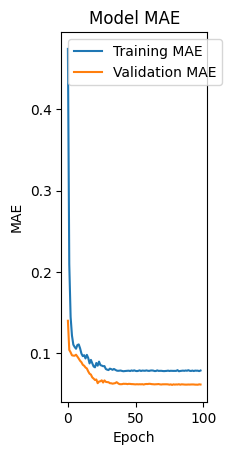

In [305]:
# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()



In [306]:
dt_param_grid = {
    'max_depth': [5, 10, ],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create grid search for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [307]:
# Fit grid search
dt_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-dt_grid_search.best_score_))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score (RMSE): 0.9958112752098253


In [308]:
# Get best model
dt_best = dt_grid_search.best_estimator_

# Make predictions (scaled)
dt_train_pred = dt_best.predict(X_train_scaled)
dt_test_pred = dt_best.predict(X_test_scaled)

# Inverse transform to get original scale
dt_train_pred_orig = y_scaler.inverse_transform(dt_train_pred.reshape(-1, 1))
dt_test_pred_orig = y_scaler.inverse_transform(dt_test_pred.reshape(-1, 1))
y_train_orig = y_scaler.inverse_transform(y_train_scaled)
y_test_orig = y_scaler.inverse_transform(y_test_scaled)

# Calculate metrics on original scale
dt_train_rmse = np.sqrt(mean_squared_error(y_train_orig, dt_train_pred_orig))
dt_test_rmse = np.sqrt(mean_squared_error(y_test_orig, dt_test_pred_orig))
dt_train_r2 = r2_score(y_train_orig, dt_train_pred_orig)
dt_test_r2 = r2_score(y_test_orig, dt_test_pred_orig)

# Add results to DataFrame
final_results_df_2 = pd.concat([final_results_df_2, pd.DataFrame([{
    'Model': 'Decision Tree',
    'Train_RMSE': dt_train_rmse,
    'Test_RMSE': dt_test_rmse,
    'Train_R2': dt_train_r2,
    'Test_R2': dt_test_r2
}])], ignore_index=True)


In [309]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {dt_test_rmse:.2f}")
print(f"R-squared Score: {dt_test_r2:.4f}")


Model Performance Metrics:
Root Mean Squared Error: 46888.62
R-squared Score: 0.4701


In [310]:
#Gradient Boosting
# Define parameter grid with only n_estimators
gb_param_grid = {
    'n_estimators': [50, 100]
}

# Create grid search
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.01,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ),
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
gb_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-gb_grid_search.best_score_))

# Get best model
gb_best = gb_grid_search.best_estimator_

# Make predictions (scaled)
gb_train_pred = gb_best.predict(X_train_scaled)
gb_test_pred = gb_best.predict(X_test_scaled)

# Inverse transform to get original scale
gb_train_pred_orig = y_scaler.inverse_transform(gb_train_pred.reshape(-1, 1))
gb_test_pred_orig = y_scaler.inverse_transform(gb_test_pred.reshape(-1, 1))

# Calculate metrics on original scale
gb_train_rmse = np.sqrt(mean_squared_error(y_train_orig, gb_train_pred_orig))
gb_test_rmse = np.sqrt(mean_squared_error(y_test_orig, gb_test_pred_orig))
gb_train_r2 = r2_score(y_train_orig, gb_train_pred_orig)
gb_test_r2 = r2_score(y_test_orig, gb_test_pred_orig)

# Add results to DataFrame
final_results_df_2 = pd.concat([final_results_df_2, pd.DataFrame([{
    'Model': 'Gradient Boosting',
    'Train_RMSE': gb_train_rmse,
    'Test_RMSE': gb_test_rmse,
    'Train_R2': gb_train_r2,
    'Test_R2': gb_test_r2
}])], ignore_index=True)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Gradient Boosting Parameters: {'n_estimators': 50}
Best CV Score (RMSE): 0.9990316826561988


In [311]:
# Print Gradient Boosting results
print("\nTuned Gradient Boosting Performance:")
print(f"Training RMSE: {gb_train_rmse:.2f}")
print(f"Testing RMSE: {gb_test_rmse:.2f}")
print(f"Training R²: {gb_train_r2:.4f}")
print(f"Testing R²: {gb_test_r2:.4f}")


Tuned Gradient Boosting Performance:
Training RMSE: 358548.69
Testing RMSE: 59888.62
Training R²: 0.5093
Testing R²: 0.1356


In [312]:
# Display final model comparison
print("\nFinal Model Comparison:")
print(final_results_df_2)


Final Model Comparison:
               Model     Train_RMSE     Test_RMSE  Train_R2   Test_R2
0     Neural Network  497846.567336  45535.034424  0.053949  0.500267
1      Decision Tree   44817.855461  46888.618490  0.992333  0.470115
2  Gradient Boosting  358548.690672  59888.620254  0.509296  0.135559


In [58]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_3, test_size=0.3, random_state=42)

# feature selection

In [59]:
rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)

# Feature importance selection (Now based on X_train's actual columns)
feature_importance_rf = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)),
                                     columns=['predictor', 'feature importance'])

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='feature importance', ascending=False)

# Select top 100 features
selected_features_rf = feature_importance_rf.head(100)['predictor'].tolist()
# Print selected features
print("Top 100 Important Features:", selected_features_rf)

Top 100 Important Features: ['TitleClean_project manager', 'views', 'application_type_SimpleOnsiteApply', 'feature_policy', 'feature_construction', 'employee_count', 'feature_engineering', 'feature_insurance', 'applies', 'feature_plan', 'feature_performance', 'feature_practice', 'feature_state', 'industry_Software Development', 'formatted_experience_level_Mid-Senior level', 'feature_individual', 'feature_group', 'feature_family', 'industry_IT Services and IT Consulting', 'feature_design', 'feature_member', 'feature_environment', 'industry_Manufacturing', 'industry_Wholesale', 'company_size', 'feature_communication', 'feature_degree', 'feature_software', 'industry_Insurance', 'feature_growth', 'formatted_work_type_Full-time', 'formatted_experience_level_Entry level', 'feature_equipment', 'feature_information', 'TitleClean_sales associate', 'feature_healthcare', 'feature_training', 'feature_salary', 'industry_Hospitals and Health Care', 'feature_responsibility', 'feature_technology', 'De

In [60]:
X_train = X_train[selected_features_rf]
X_test = X_test[selected_features_rf]

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [63]:
# Define model parameters
INPUT_DIM = X_train_scaled.shape[1]
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 150

In [64]:
class AdaptiveLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(AdaptiveLayer, self).__init__(**kwargs)
        self.units = units
        self.dense = layers.Dense(units, activation='relu')
        self.batch_norm = layers.BatchNormalization()
        self.dropout = layers.Dropout(0.3)
        self.activation = layers.ReLU()

    def call(self, inputs, training=False):
        x = self.dense(inputs)
        x = self.batch_norm(x, training=training)
        x = self.dropout(x, training=training)
        return self.activation(x)

In [65]:
def create_adaptive_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))

    # First adaptive layer with larger units
    x = AdaptiveLayer(128)(inputs)

    # Multiple adaptive layers with decreasing units
    x = AdaptiveLayer(64)(x)
    x = AdaptiveLayer(32)(x)
    x = AdaptiveLayer(16)(x)

    # Output layer
    outputs = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [66]:
# Create and compile the model
model = create_adaptive_model(INPUT_DIM)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae', 'mse']
)

In [67]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)


In [68]:
# Model checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [69]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,  # Use scaled target
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7885 - mae: 0.6571 - mse: 1.7885
Epoch 1: val_loss improved from inf to 1.22944, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.7882 - mae: 0.6568 - mse: 1.7882 - val_loss: 1.2294 - val_mae: 0.1071 - val_mse: 1.2294 - learning_rate: 0.0010
Epoch 2/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8239 - mae: 0.2200 - mse: 0.8239
Epoch 2: val_loss improved from 1.22944 to 1.21591, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8253 - mae: 0.2198 - mse: 0.8253 - val_loss: 1.2159 - val_mae: 0.0651 - val_mse: 1.2159 - learning_rate: 0.0010
Epoch 3/150
687/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5239 - mae: 0.1187 - mse: 0.5239
Epoch 3: val_loss improved from 1.21591 to 1.21237, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5329 - mae: 0.1185 - mse: 0.5329 - val_loss: 1.2124 - val_mae: 0.0466 - val_mse: 1.2124 - learning_rate: 0.0010
Epoch 4/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4015 - mae: 0.0702 - mse: 0.4015
Epoch 4: val_loss improved from 1.21237 to 1.21135, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4063 - mae: 0.0702 - mse: 0.4063 - val_loss: 1.2113 - val_mae: 0.0447 - val_mse: 1.2113 - learning_rate: 0.0010
Epoch 5/150
693/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8287 - mae: 0.0591 - mse: 0.8287
Epoch 5: val_loss did not improve from 1.21135
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8298 - mae: 0.0591 - mse: 0.8298 - val_loss: 1.2119 - val_mae: 0.0401 - val_mse: 1.2119 - learning_rate: 0.0010
Epoch 6/150
682/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5954 - mae: 0.0489 - mse: 0.5954
Epoch 6: val_loss did not improve from 1.21135
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6047 - mae: 0.0490 - mse: 0.6047 - val_loss: 1.2114 - val_mae: 0.0391 - val_mse: 1.2114 - learning_rate: 0.0010
Epoch 7/150
683/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5867 - mae: 0.0461 - mse: 0.5867
Epoch 7: val_loss did not improve from 1.21135
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5962 - mae: 0.0463 - mse: 0.596

700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.8297 - mae: 0.0743 - mse: 1.8297 - val_loss: 1.2107 - val_mae: 0.0472 - val_mse: 1.2107 - learning_rate: 0.0010
Epoch 10/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5780 - mae: 0.0938 - mse: 3.5780
Epoch 10: val_loss improved from 1.21068 to 1.20786, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.5405 - mae: 0.0934 - mse: 3.5405 - val_loss: 1.2079 - val_mae: 0.0536 - val_mse: 1.2079 - learning_rate: 0.0010
Epoch 11/150
699/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1018 - mae: 0.0668 - mse: 1.1018
Epoch 11: val_loss did not improve from 1.20786
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.1013 - mae: 0.0668 - mse: 1.1013 - val_loss: 1.2110 - val_mae: 0.0553 - val_mse: 1.2110 - learning_rate: 0.0010
Epoch 12/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3494 - mae: 0.0657 - mse: 1.3494
Epoch 12: val_loss did not improve from 1.20786
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3476 - mae: 0.0657 - mse: 1.3476 - val_loss: 1.2110 - val_mae: 0.0532 - val_mse: 1.2110 - learning_rate: 0.0010
Epoch 13/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3975 - mae: 0.0523 - mse: 0.3975
Epoch 13: val_loss did not improve from 1.20786
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4021 - mae: 0.0524 - mse:

700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1816 - mae: 0.0693 - mse: 1.1816 - val_loss: 1.2078 - val_mae: 0.0470 - val_mse: 1.2078 - learning_rate: 2.0000e-04
Epoch 17/150
687/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7301 - mae: 0.0621 - mse: 0.7301
Epoch 17: val_loss did not improve from 1.20781
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7344 - mae: 0.0621 - mse: 0.7344 - val_loss: 1.2079 - val_mae: 0.0489 - val_mse: 1.2079 - learning_rate: 2.0000e-04
Epoch 18/150
688/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6827 - mae: 0.0602 - mse: 0.6827
Epoch 18: val_loss improved from 1.20781 to 1.20714, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6874 - mae: 0.0603 - mse: 0.6874 - val_loss: 1.2071 - val_mae: 0.0497 - val_mse: 1.2071 - learning_rate: 2.0000e-04
Epoch 19/150
696/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5136 - mae: 0.0605 - mse: 0.5136
Epoch 19: val_loss improved from 1.20714 to 1.20705, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5165 - mae: 0.0606 - mse: 0.5165 - val_loss: 1.2071 - val_mae: 0.0512 - val_mse: 1.2071 - learning_rate: 2.0000e-04
Epoch 20/150
686/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6737 - mae: 0.0627 - mse: 0.6737
Epoch 20: val_loss improved from 1.20705 to 1.20666, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6794 - mae: 0.0627 - mse: 0.6794 - val_loss: 1.2067 - val_mae: 0.0505 - val_mse: 1.2067 - learning_rate: 2.0000e-04
Epoch 21/150
694/700 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9092 - mae: 0.0698 - mse: 0.9092
Epoch 21: val_loss improved from 1.20666 to 1.20609, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.9094 - mae: 0.0698 - mse: 0.9094 - val_loss: 1.2061 - val_mae: 0.0509 - val_mse: 1.2061 - learning_rate: 2.0000e-04
Epoch 22/150
684/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1504 - mae: 0.0719 - mse: 1.1504
Epoch 22: val_loss did not improve from 1.20609
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1451 - mae: 0.0718 - mse: 1.1451 - val_loss: 1.2064 - val_mae: 0.0530 - val_mse: 1.2064 - learning_rate: 2.0000e-04
Epoch 23/150
687/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0793 - mae: 0.0799 - mse: 1.0793
Epoch 23: val_loss did not improve from 1.20609
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0764 - mae: 0.0797 - mse: 1.0764 - val_loss: 1.2068 - val_mae: 0.0553 - val_mse: 1.2068 - learning_rate: 2.0000e-04
Epoch 24/150
690/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7999 - mae: 0.0833 - mse: 1.7999
Epoch 24: val_loss did not improve from 1.20609
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.7862 - mae: 0

700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5575 - mae: 0.0669 - mse: 0.5575 - val_loss: 1.2051 - val_mae: 0.0545 - val_mse: 1.2051 - learning_rate: 2.0000e-04
Epoch 26/150
691/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0994 - mae: 0.0816 - mse: 1.0994
Epoch 26: val_loss did not improve from 1.20509
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0969 - mae: 0.0815 - mse: 1.0969 - val_loss: 1.2053 - val_mae: 0.0566 - val_mse: 1.2053 - learning_rate: 2.0000e-04
Epoch 27/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8257 - mae: 0.0736 - mse: 0.8257
Epoch 27: val_loss did not improve from 1.20509
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8262 - mae: 0.0736 - mse: 0.8262 - val_loss: 1.2059 - val_mae: 0.0567 - val_mse: 1.2059 - learning_rate: 2.0000e-04
Epoch 28/150
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3890 - mae: 0.0669 - mse: 0.3890
Epoch 28: val_loss improved from 1.20509 to 1.20482, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3897 - mae: 0.0669 - mse: 0.3897 - val_loss: 1.2048 - val_mae: 0.0541 - val_mse: 1.2048 - learning_rate: 2.0000e-04
Epoch 29/150
698/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4063 - mae: 0.0855 - mse: 1.4063
Epoch 29: val_loss did not improve from 1.20482
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4042 - mae: 0.0854 - mse: 1.4042 - val_loss: 1.2052 - val_mae: 0.0572 - val_mse: 1.2052 - learning_rate: 2.0000e-04
Epoch 30/150
689/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1444 - mae: 0.0996 - mse: 2.1444
Epoch 30: val_loss did not improve from 1.20482
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.1235 - mae: 0.0994 - mse: 2.1235 - val_loss: 1.2049 - val_mae: 0.0600 - val_mse: 1.2049 - learning_rate: 2.0000e-04
Epoch 31/150
695/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5737 - mae: 0.0793 - mse: 0.5737
Epoch 31: val_loss improved from 1.20482 to 1.20374, saving model to best_model.h5


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5766 - mae: 0.0794 - mse: 0.5766 - val_loss: 1.2037 - val_mae: 0.0579 - val_mse: 1.2037 - learning_rate: 2.0000e-04
Epoch 32/150
684/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3378 - mae: 0.0907 - mse: 1.3378
Epoch 32: val_loss did not improve from 1.20374
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3278 - mae: 0.0906 - mse: 1.3278 - val_loss: 1.2041 - val_mae: 0.0598 - val_mse: 1.2041 - learning_rate: 2.0000e-04
Epoch 33/150
690/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4823 - mae: 0.0793 - mse: 0.4823
Epoch 33: val_loss did not improve from 1.20374
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4890 - mae: 0.0794 - mse: 0.4890 - val_loss: 1.2044 - val_mae: 0.0572 - val_mse: 1.2044 - learning_rate: 2.0000e-04
Epoch 34/150
688/700 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7054 - mae: 0.0850 - mse: 0.7054
Epoch 34: val_loss did not improve from 1.20374
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7093 - mae: 0

In [70]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Add neural network results to DataFrame
final_results_df_3 = pd.concat([final_results_df_3, pd.DataFrame([{
    'Model': 'Neural Network',
    'Train_RMSE': train_rmse,
    'Test_RMSE': rmse,
    'Train_R2': train_r2,
    'Test_R2': r2
}])], ignore_index=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-70-2c99ad6c6cff>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_results_df_3 = pd.concat([final_results_df_3, pd.DataFrame([{


In [71]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")



Model Performance Metrics:
Root Mean Squared Error: 1551.72
R-squared Score: 0.1115


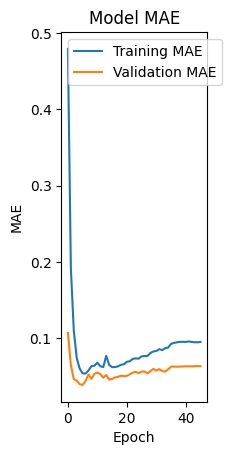

In [72]:
# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()



In [73]:
dt_param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create grid search for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [74]:
# Fit grid search
dt_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-dt_grid_search.best_score_))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score (RMSE): 1.0451546188399115


In [75]:
# Get best model
dt_best = dt_grid_search.best_estimator_

# Make predictions (scaled)
dt_train_pred = dt_best.predict(X_train_scaled)
dt_test_pred = dt_best.predict(X_test_scaled)

# Inverse transform to get original scale
dt_train_pred_orig = y_scaler.inverse_transform(dt_train_pred.reshape(-1, 1))
dt_test_pred_orig = y_scaler.inverse_transform(dt_test_pred.reshape(-1, 1))
y_train_orig = y_scaler.inverse_transform(y_train_scaled)
y_test_orig = y_scaler.inverse_transform(y_test_scaled)

# Calculate metrics on original scale
dt_train_rmse = np.sqrt(mean_squared_error(y_train_orig, dt_train_pred_orig))
dt_test_rmse = np.sqrt(mean_squared_error(y_test_orig, dt_test_pred_orig))
dt_train_r2 = r2_score(y_train_orig, dt_train_pred_orig)
dt_test_r2 = r2_score(y_test_orig, dt_test_pred_orig)

# Add results to DataFrame
final_results_df_3 = pd.concat([final_results_df_3, pd.DataFrame([{
    'Model': 'Decision Tree',
    'Train_RMSE': dt_train_rmse,
    'Test_RMSE': dt_test_rmse,
    'Train_R2': dt_train_r2,
    'Test_R2': dt_test_r2
}])], ignore_index=True)


In [76]:
# Evaluate the model
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {dt_test_rmse:.2f}")
print(f"R-squared Score: {dt_test_r2:.4f}")


Model Performance Metrics:
Root Mean Squared Error: 2320.79
R-squared Score: -0.9874


In [77]:
#Gradient Boosting
# Define parameter grid with only n_estimators
gb_param_grid = {
    'n_estimators': [50, 100]
}

# Create grid search
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(
        learning_rate=0.01,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ),
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
gb_grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print best parameters
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best CV Score (RMSE):", np.sqrt(-gb_grid_search.best_score_))

# Get best model
gb_best = gb_grid_search.best_estimator_

# Make predictions (scaled)
gb_train_pred = gb_best.predict(X_train_scaled)
gb_test_pred = gb_best.predict(X_test_scaled)

# Inverse transform to get original scale
gb_train_pred_orig = y_scaler.inverse_transform(gb_train_pred.reshape(-1, 1))
gb_test_pred_orig = y_scaler.inverse_transform(gb_test_pred.reshape(-1, 1))

# Calculate metrics on original scale
gb_train_rmse = np.sqrt(mean_squared_error(y_train_orig, gb_train_pred_orig))
gb_test_rmse = np.sqrt(mean_squared_error(y_test_orig, gb_test_pred_orig))
gb_train_r2 = r2_score(y_train_orig, gb_train_pred_orig)
gb_test_r2 = r2_score(y_test_orig, gb_test_pred_orig)

# Add results to DataFrame
final_results_df_3 = pd.concat([final_results_df_3, pd.DataFrame([{
    'Model': 'Gradient Boosting',
    'Train_RMSE': gb_train_rmse,
    'Test_RMSE': gb_test_rmse,
    'Train_R2': gb_train_r2,
    'Test_R2': gb_test_r2
}])], ignore_index=True)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Gradient Boosting Parameters: {'n_estimators': 50}
Best CV Score (RMSE): 1.0173487850092588


In [78]:
# Print Gradient Boosting results
print("\nTuned Gradient Boosting Performance:")
print(f"Training RMSE: {gb_train_rmse:.2f}")
print(f"Testing RMSE: {gb_test_rmse:.2f}")
print(f"Training R²: {gb_train_r2:.4f}")
print(f"Testing R²: {gb_test_r2:.4f}")


Tuned Gradient Boosting Performance:
Training RMSE: 2447.94
Testing RMSE: 1710.37
Training R²: 0.1282
Testing R²: -0.0794


In [79]:
# Display final model comparison
print("\nFinal Model Comparison:")
print(final_results_df_3)


Final Model Comparison:
               Model   Train_RMSE    Test_RMSE  Train_R2   Test_R2
0     Neural Network  2379.427379  1551.718080  0.176309  0.111550
1      Decision Tree  2245.409017  2320.786726  0.266483 -0.987366
2  Gradient Boosting  2447.938190  1710.365083  0.128193 -0.079407
